# Title Embeddings

Before using this notebook, make sure to run `create_title_embeddings.ipynb`

In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
articles = pd.read_feather('Data/dataframes/article_dataframe_with_embeddings.feather')

In [3]:
articles

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text,incoming_links,num_hyperlinks,num_characters,hyperlink_density,embeddings
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...,0,11,11612,0.000947,"[-0.12923911213874817, 0.02362193539738655, -0..."
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÅland\n\n2007 Schools Wikiped...,0,19,17238,0.001102,"[-0.05364985018968582, -0.018478475511074066, ..."
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉdouard Manet\n\n2007 Schools...,0,20,18996,0.001053,"[-0.01709255389869213, 0.08353389799594879, -0..."
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...,0,8,13083,0.000611,"[0.04833950847387314, 0.046594519168138504, 0...."
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÓengus I of the Picts\n\n2007...,0,10,12944,0.000773,"[-0.07649108022451401, 0.10481206327676773, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZionism\n\n2007 Schools Wikip...,25,74,62086,0.001192,"[-0.016020476818084717, 0.0894060954451561, -0..."
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZirconium\n\n2007 Schools Wik...,15,42,13253,0.003169,"[-0.10549122095108032, 0.023488083854317665, -..."
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZoroaster\n\n2007 Schools Wik...,9,28,19726,0.001419,"[-0.06657274067401886, 0.12227798998355865, -0..."
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...,5,5,2341,0.002136,"[-0.173138827085495, 0.09522440284490585, 0.00..."


# Embedding Projector

Embedding Projector is a useful tool made by TF to look at word embedding spaces. Let's save our data so it can be opened there.

https://projector.tensorflow.org/

Note that the embedding projector can also be used locally.

In [4]:
articles

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text,incoming_links,num_hyperlinks,num_characters,hyperlink_density,embeddings
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...,0,11,11612,0.000947,"[-0.12923911213874817, 0.02362193539738655, -0..."
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÅland\n\n2007 Schools Wikiped...,0,19,17238,0.001102,"[-0.05364985018968582, -0.018478475511074066, ..."
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉdouard Manet\n\n2007 Schools...,0,20,18996,0.001053,"[-0.01709255389869213, 0.08353389799594879, -0..."
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...,0,8,13083,0.000611,"[0.04833950847387314, 0.046594519168138504, 0...."
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÓengus I of the Picts\n\n2007...,0,10,12944,0.000773,"[-0.07649108022451401, 0.10481206327676773, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZionism\n\n2007 Schools Wikip...,25,74,62086,0.001192,"[-0.016020476818084717, 0.0894060954451561, -0..."
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZirconium\n\n2007 Schools Wik...,15,42,13253,0.003169,"[-0.10549122095108032, 0.023488083854317665, -..."
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZoroaster\n\n2007 Schools Wik...,9,28,19726,0.001419,"[-0.06657274067401886, 0.12227798998355865, -0..."
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...,5,5,2341,0.002136,"[-0.173138827085495, 0.09522440284490585, 0.00..."


In [5]:
articles.columns

Index(['article', 'article_unrendered_unicode', 'category', 'linkSource',
       'linkTarget', 'distances', 'plain_text', 'incoming_links',
       'num_hyperlinks', 'num_characters', 'hyperlink_density', 'embeddings'],
      dtype='object')

In [6]:
articles['category'][0]

array(['subject.History.British_History.British_History_1500_and_before_including_Roman_Britain',
       'subject.People.Historical_figures'], dtype=object)

In [7]:
max_category_length = 0
max_num_categories= 0
for category in articles['category']:
    if category is None:
        continue
    if len(category) > max_num_categories:
        max_num_categories = len(category)
    for c in category:
        split_at_period = c.split('.')
        if len(split_at_period) > max_category_length:
            max_category_length = len(split_at_period)

print(max_category_length)
print(max_num_categories)

4
3


In [8]:
# Separate embeddings as a new DataFrame
embeddings_df = pd.DataFrame(articles['embeddings'].tolist())

# Save embeddings to TSV
embeddings_df.to_csv('Data/embeddings/embeddings.tsv', sep='\t', header=False, index=False)

In [9]:
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.129239,0.023622,-0.004901,-0.019496,-0.043281,-0.023776,0.151594,-0.024696,0.029391,-0.024854,...,0.030848,-0.012515,0.036324,-0.093402,0.008698,0.012994,0.057794,-0.086949,-0.057250,0.032103
1,-0.053650,-0.018478,-0.002707,-0.070808,0.022054,0.023956,0.101284,0.018430,0.041392,0.057475,...,0.011835,-0.006334,-0.043779,-0.062824,-0.025941,0.028649,0.071299,-0.001759,-0.049777,-0.017845
2,-0.017093,0.083534,-0.004965,0.031150,0.068219,0.008867,0.076092,0.092251,0.086872,-0.013483,...,0.052748,0.023980,-0.092857,-0.015727,-0.016728,-0.008173,-0.014128,-0.054361,0.077377,0.027425
3,0.048340,0.046595,0.052632,-0.014629,0.036541,0.013622,0.100541,0.037038,-0.000652,0.031485,...,0.025546,-0.004202,-0.061284,-0.042785,0.011009,-0.014036,0.102434,0.015332,0.002907,-0.007939
4,-0.076491,0.104812,-0.041315,0.015681,0.033413,-0.105169,0.172783,0.091473,0.106234,-0.040693,...,-0.022338,-0.081939,0.028346,0.000755,-0.018615,0.033441,0.047184,0.026550,0.017090,-0.001717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,-0.016020,0.089406,-0.087763,0.036597,0.045802,-0.032456,0.076705,-0.059245,0.002545,0.040143,...,0.134890,-0.006052,-0.047146,0.039714,-0.060199,0.117039,0.146904,0.001081,0.037222,-0.089234
4600,-0.105491,0.023488,-0.112929,0.097368,0.050227,-0.123149,0.088657,0.099268,-0.027261,-0.052532,...,0.129530,0.017543,0.034184,-0.002701,-0.062103,0.017476,0.033705,-0.014559,0.053281,0.009433
4601,-0.066573,0.122278,-0.053246,0.045836,-0.041489,-0.057452,0.043997,0.079094,0.014392,-0.040327,...,0.112615,0.024729,-0.015860,0.010803,-0.049376,0.051883,0.118521,-0.068367,0.055192,0.023818
4602,-0.173139,0.095224,0.006933,0.036729,-0.046884,-0.024555,0.178606,0.012995,0.071440,0.007848,...,0.022571,-0.012395,0.036863,0.036824,-0.010945,0.069272,0.007396,0.028357,0.004489,-0.000383


In [10]:
# Expand categories into multiple subcategory levels

# Prepare a DataFrame for metadata
metadata_df = articles[['article']].copy()

# Parse category information into separate columns
category_columns = [f'category_{j+1}_level_{i+1}' for j in range(max_num_categories) for i in range(max_category_length)]

for i in range(max_num_categories):
    for j in range(max_category_length):
        metadata_df[f'category_{i+1}_level{j+1}'] = articles['category'].apply(
            lambda x: x[i].split('.')[j] if x is not None and i < len(x) and j < len(x[i].split('.')) else None
        )

# metadata_df
metadata_df = metadata_df.drop(columns=['category_1_level1', 'category_2_level1'], axis=1)

# # Save metadata to TSV
metadata_df.to_csv('Data/embeddings/metadata.tsv', sep='\t', header=True, index=False)


In [11]:
metadata_df

,article,category_1_level2,category_1_level3,category_1_level4,category_2_level2,category_2_level3,category_2_level4,category_3_level1,category_3_level2,category_3_level3,category_3_level4
0,Áedán_mac_Gabráin,History,British_History,British_History_1500_and_before_including_Roma...,People,Historical_figures,None,None,None,None,None
1,Åland,Countries,None,None,Geography,European_Geography,European_Countries,None,None,None,None
2,Édouard_Manet,People,Artists,None,None,None,None,None,None,None,None
3,Éire,Countries,None,None,Geography,European_Geography,European_Countries,None,None,None,None
4,Óengus_I_of_the_Picts,History,British_History,British_History_1500_and_before_including_Roma...,People,Historical_figures,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4599,Zionism,People,Political_People,None,Religion,Religious_movements_traditions_and_organizations,None,None,None,None,None
4600,Zirconium,Science,Chemistry,Chemical_elements,None,None,None,None,None,None,None
4601,Zoroaster,People,Religious_figures_and_leaders,None,None,None,None,None,None,None,None
4602,Zuid-Gelders,Geography,European_Geography,None,Language_and_literature,Languages,None,None,None,None,None


## In-Line TF Embedding Projector

In [ ]:
# %pip install tensorboard
# %pip install tensorboard

In [13]:
%load_ext tensorboard

In [14]:
import os
import tensorflow as tf
from tensorboard.plugins import projector

ModuleNotFoundError: No module named 'tensorflow'

In [78]:
%tensorboard --logdir Data/embeddings/

/tmp/ipykernel_11683/2717752743.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, cmap=colormap, alpha=0.3)


Text(0.5, 1.0, 'Article Names visualized using t-SNE')

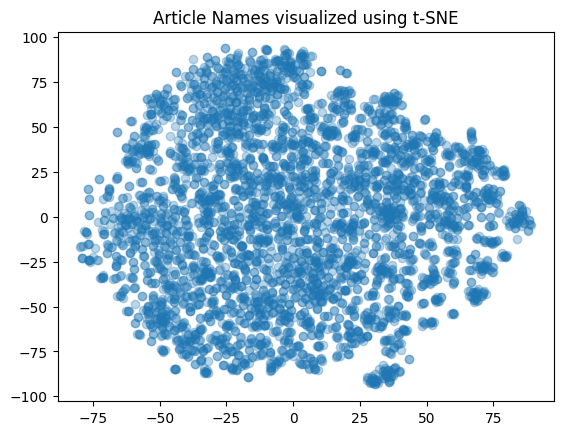

In [23]:
# Taken from OpenAI's tutorial on embeddings

matrix = np.array(articles['embeddings'].tolist())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

colors = ["red", "darkorange", "gold", "turquiose", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
# color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, cmap=colormap, alpha=0.3)
plt.title("Article Names visualized using t-SNE")